### DESCRIPTION

Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Domain: Finance and Housing

Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

1. Load the data :

Read the “housing.csv” file from the folder into the program.
Print first few rows of this data.
Extract input (X) and output (Y) data from the dataset.
2. Handle missing values :

Fill the missing values with the mean of the respective column.
3. Encode categorical data :

Convert categorical column in the dataset to numerical data.
4. Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.
5. Standardize data :

Standardize training and test datasets.
6. Perform Linear Regression : 

Perform Linear Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error (RMSE) from Linear Regression.
            [ HINT: Import mean_squared_error from sklearn.metrics ]

7. Perform Decision Tree Regression :

Perform Decision Tree Regression on training data.
Predict output for test dataset using the fitted model.
Print root mean squared error from Decision Tree Regression.
8. Perform Random Forest Regression :

Perform Random Forest Regression on training data.
Predict output for test dataset using the fitted model.
Print RMSE (root mean squared error) from Random Forest Regression.
9. Bonus exercise: Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).
Perform Linear Regression to predict housing values based on median_income.
Predict output for test dataset using the fitted model.
Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.
Dataset Description :

Field	Description
longitude	(signed numeric - float) : Longitude value for the block in California, USA
latitude	(numeric - float ) : Latitude value for the block in California, USA
housing_median_age	(numeric - int ) : Median age of the house in the block
total_rooms	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
total_bedrooms	(numeric - float ) : Count of the total number of bedrooms in all houses in the block
population	(numeric - int ) : Count of the total number of population in the block
households	(numeric - int ) : Count of the total number of households in the block
median_income	(numeric - float ) : Median of the total household income of all the houses in the block
ocean_proximity	(numeric - categorical ) : Type of the landscape of the block  Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  
median_house_value	(numeric - int ) : Median of the household prices of all the houses in the block

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the “housing.csv” file from the folder into the program.
data= pd.read_excel(r'C:\Users\user-pc\Machine learning\Projects\1553768847_housing.xlsx')

In [4]:
#Print first few rows of this data.
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
data.shape

(20640, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640,20640.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136,NaN
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,NaN,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,NaN,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,NaN,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,NaN,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,NaN,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,NaN,264725.000000


In [8]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [9]:
#univariate analysis
data.columns
data['housing_median_age'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E14A4F320>,
      dtype=object)

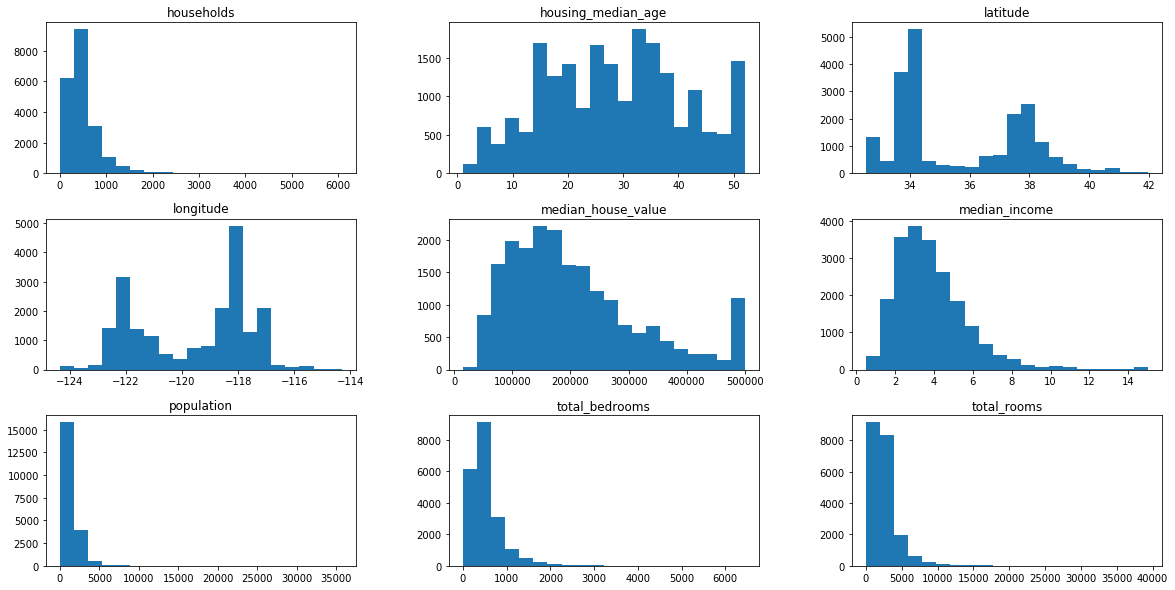

In [10]:
data.hist(bins=20, figsize=(20,10), grid=False)

In [11]:
#Extract input (X) and output (Y) data from the dataset.
X= data.iloc[:,[2,3,4,5,6,7,8]]
Y= data.iloc[:,-1]

In [12]:
X.isna().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [13]:
#Fill the missing values with the mean of the respective column.
from sklearn.preprocessing import Imputer
imputer= Imputer(missing_values='NaN',strategy='mean', axis=0)

In [14]:
imputer= imputer.fit(X.iloc[:,2:3])
X.iloc[:,2:3]= imputer.transform(X.iloc[:,2:3])

C:\python\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
X.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [16]:
Y.isna().sum()

0

In [17]:
#Convert categorical column in the dataset to numerical data.
X['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [18]:
X= pd.get_dummies(data=X, columns=['ocean_proximity'], prefix='ocean_proximity')

In [19]:
X= X.drop('ocean_proximity_ISLAND', axis=1)

In [20]:
X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,880,129.0,322,126,8.3252,0,0,1,0
1,21,7099,1106.0,2401,1138,8.3014,0,0,1,0
2,52,1467,190.0,496,177,7.2574,0,0,1,0
3,52,1274,235.0,558,219,5.6431,0,0,1,0
4,52,1627,280.0,565,259,3.8462,0,0,1,0


In [31]:
#Split the data into 80% training dataset and 20% test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=0)

In [32]:
#Standardize training and test datasets.
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [24]:
X_train.iloc[:,0:6]= sc.fit_transform(X_train.iloc[:,0:6])
X_test.iloc[:,0:6]= sc.transform(X_test.iloc[:,0:6])

C:\python\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
#Perform Linear Regression on training data.
from sklearn.linear_model import LinearRegression
regressor1= LinearRegression()
print(regressor1.fit(X_train, Y_train))
print(regressor1.coef_)
print(X_train.columns)
print(regressor1.intercept_)
print('\n')

#Predict output for test dataset using the fitted model.
print(regressor1.predict(X_test))
print('\n')
#Print root mean squared error (RMSE) from Linear Regression.
from sklearn import metrics
print(metrics.r2_score(Y_test, regressor1.predict(X_test)))
print(np.sqrt(metrics.mean_squared_error(Y_test, regressor1.predict(X_test))))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 1.18809064e+03 -5.84694783e+00  5.35321248e+01 -3.75084428e+01
  1.00355884e+02  4.00036765e+04 -1.81849574e+05 -2.49210382e+05
 -1.77782771e+05 -1.67358425e+05]
Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')
208997.77075511677


[221995.92208631 296800.86066037 174326.24742686 ... 110221.83479834
 229286.99168043 221718.81542081]


0.6277272869749245
69672.57919347247


In [35]:
#Removing some colums based on coffecient values
X_train1= X_train.iloc[:,[0,4,5,6,7,8,9]]
X_test1= X_test.iloc[:,[0,4,5,6,7,8,9]]
regressor2= LinearRegression()
print(regressor2.fit(X_train1, Y_train))
print(regressor2.coef_)
print(X_train1.columns)
print(regressor2.intercept_)
regressor2.predict(X_test1)
from sklearn import metrics
print(metrics.r2_score(Y_test, regressor2.predict(X_test1)))
print(np.sqrt(metrics.mean_squared_error(Y_test, regressor2.predict(X_test1))))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 1.21323589e+03  2.56334994e+01  3.86075131e+04 -1.90715025e+05
 -2.58666677e+05 -1.79289170e+05 -1.71954606e+05]
Index(['housing_median_age', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')
218564.4212258035
0.5928764042115311
72860.8817251338


In [36]:
#Perform Decision Tree Regression on training data.
from sklearn.tree import DecisionTreeRegressor
dtree= DecisionTreeRegressor(random_state=0)
dtree.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [292]:
dtree.feature_importances_

array([0.0778387 , 0.0576147 , 0.07510548, 0.09715195, 0.05745368,
       0.34810893, 0.00573383, 0.27002493, 0.00539512, 0.00557266])

In [293]:
#Predict output for test dataset using the fitted model.
dtree.predict(X_test)

array([ 98500., 276100., 139200., ..., 173200., 238400.,  84000.])

In [37]:
#Print root mean squared error from Decision Tree Regression.
from sklearn import metrics
print(metrics.r2_score(Y_test, dtree.predict(X_test)))
print(np.sqrt(metrics.mean_squared_error(Y_test, dtree.predict(X_test))))

0.4329837956263548
85986.25235378805


In [39]:
#Perform Random Forest Regression on training data.
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100, random_state=10)
rf.fit(X_train, Y_train)
print('\n')

#Predict output for test dataset using the fitted model.
print(rf.predict(X_test))
print('\n')

#Print RMSE (root mean squared error) from Random Forest Regression.
from sklearn import metrics
print(metrics.r2_score(Y_test, rf.predict(X_test)))
print(np.sqrt(metrics.mean_squared_error(Y_test, rf.predict(X_test))))



[167706.01 257836.   150343.   ... 127144.   227775.   240802.  ]


0.7048724871155327
62034.906885854885
